In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Load Data Files

In [21]:
def load_data(file_path: str) -> pd.DataFrame:
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

In [22]:
anime_filtered = load_data('../data/clean/anime-dataset-filtered.csv')

watch_base_23 = load_data('../data/raw/users-score-2023.csv')
watch_base_25 = load_data('../data/raw/users-score-2025.csv')

watch_clean_23 = load_data('../data/clean/users-score-shrunk-2023.csv')
watch_clean_25 = load_data('../data/clean/users-score-2025.csv')

Print various watchlist statistics

In [23]:
print("2023 Dataset - Smallest anime_id:", watch_base_23['anime_id'].min())
print("2023 Dataset - Largest anime_id:", watch_base_23['anime_id'].max())
print("2025 Dataset - Smallest anime_id:", watch_base_25['anime_id'].min())
print("2025 Dataset - Largest anime_id:", watch_base_25['anime_id'].max())

2023 Dataset - Smallest anime_id: 1
2023 Dataset - Largest anime_id: 56085
2025 Dataset - Smallest anime_id: 1
2025 Dataset - Largest anime_id: 62892


In [24]:
print("2023 Dataset - Unique users:", watch_base_23['user_id'].nunique(), "in total of", len(watch_base_23), "entries")
print("2025 Dataset - Unique users:", watch_base_25['user_id'].nunique(), "in total of", len(watch_base_25), "entries")

2023 Dataset - Unique users: 270033 in total of 24325191 entries
2025 Dataset - Unique users: 220823 in total of 24928042 entries


Quality Metric Parameter Statistics

In [25]:
def generate_list(series: pd.Series) -> list:
    """Generate a list of unique items from a pandas Series of comma-separated strings."""
    unique_items = set()
    for entry in series.dropna():
        items = [item.strip() for item in entry.split(',')]
        unique_items.update(items)
    return sorted(unique_items)

In [26]:
genres = generate_list(anime_filtered['Genres'])
print("Number of unique genres in anime dataset:", len(genres))
print("List of unique genres:", genres)

Number of unique genres in anime dataset: 21
List of unique genres: ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']


In [27]:
explicit_genres = generate_list(anime_filtered['Explicit Genres'])
print("Number of unique explicit genres in anime dataset:", len(explicit_genres))
print("List of unique explicit genres:", explicit_genres)

Number of unique explicit genres in anime dataset: 0
List of unique explicit genres: []


In [28]:
themes = generate_list(anime_filtered['Themes'])
print("Number of unique themes in anime dataset:", len(themes))
print("List of unique themes:", themes)

Number of unique themes in anime dataset: 52
List of unique themes: ['Adult Cast', 'Anthropomorphic', 'CGDCT', 'Childcare', 'Combat Sports', 'Crossdressing', 'Delinquents', 'Detective', 'Educational', 'Gag Humor', 'Gore', 'Harem', 'High Stakes Game', 'Historical', 'Idols (Female)', 'Idols (Male)', 'Isekai', 'Iyashikei', 'Love Polygon', 'Love Status Quo', 'Magical Sex Shift', 'Mahou Shoujo', 'Martial Arts', 'Mecha', 'Medical', 'Military', 'Music', 'Mythology', 'Organized Crime', 'Otaku Culture', 'Parody', 'Performing Arts', 'Pets', 'Psychological', 'Racing', 'Reincarnation', 'Reverse Harem', 'Samurai', 'School', 'Showbiz', 'Space', 'Strategy Game', 'Super Power', 'Survival', 'Team Sports', 'Time Travel', 'Urban Fantasy', 'Vampire', 'Video Game', 'Villainess', 'Visual Arts', 'Workplace']


In [29]:
demographics = generate_list(anime_filtered['Demographics'])
print("Number of unique demographics in anime dataset:", len(demographics))
print("List of unique demographics:", demographics)

Number of unique demographics in anime dataset: 5
List of unique demographics: ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen']


In [30]:
print(f"Total number of quality metric parameters: {len(genres) + len(explicit_genres) + len(themes) + len(demographics)}")

Total number of quality metric parameters: 78


Plot the grow of watched anime

In [31]:
watch_count_23 = watch_clean_23.groupby('user_id')['anime_id'].nunique()
watch_count_25 = watch_clean_25.groupby('user_id')['anime_id'].nunique()

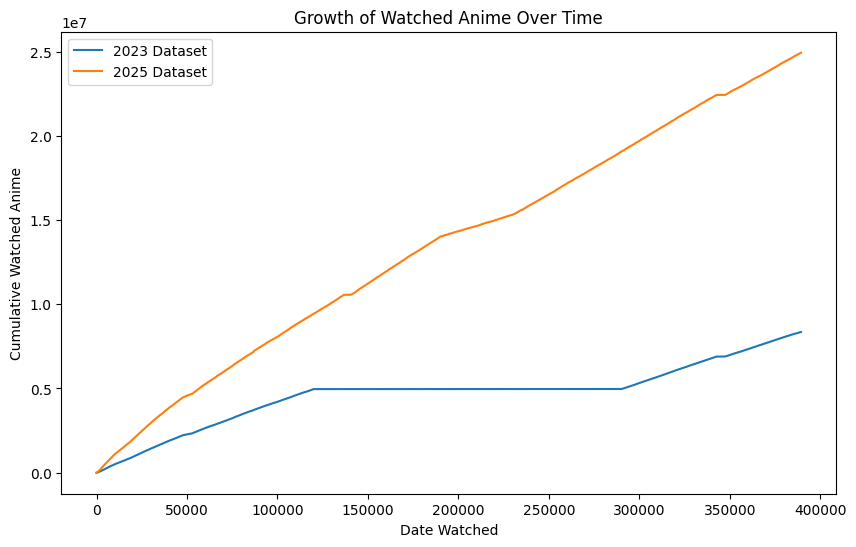

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(watch_clean_23.groupby('user_id').size().cumsum(), label='2023 Dataset')
plt.plot(watch_clean_25.groupby('user_id').size().cumsum(), label='2025 Dataset')
plt.xlabel('Date Watched')
plt.ylabel('Cumulative Watched Anime')
plt.title('Growth of Watched Anime Over Time')
plt.legend()
plt.show()

In [33]:
count_23 = watch_clean_23['user_id'].value_counts()
count_25 = watch_clean_25['user_id'].value_counts()

common_users = count_23.index.intersection(count_25.index)
grown_users = common_users[count_25[common_users] > count_23[common_users]].tolist()

print("Number of users who watched more anime in 2025 than in 2023:", len(grown_users))

Number of users who watched more anime in 2025 than in 2023: 12803


In [34]:
growth_counts = count_25[grown_users] - count_23[grown_users]
print("Minimum growth in watched anime count:", growth_counts.min())
print("Maximum growth in watched anime count:", growth_counts.max())
print("Average growth in watched anime count:", growth_counts.mean())

Minimum growth in watched anime count: 1
Maximum growth in watched anime count: 10145
Average growth in watched anime count: 196.17402171366086


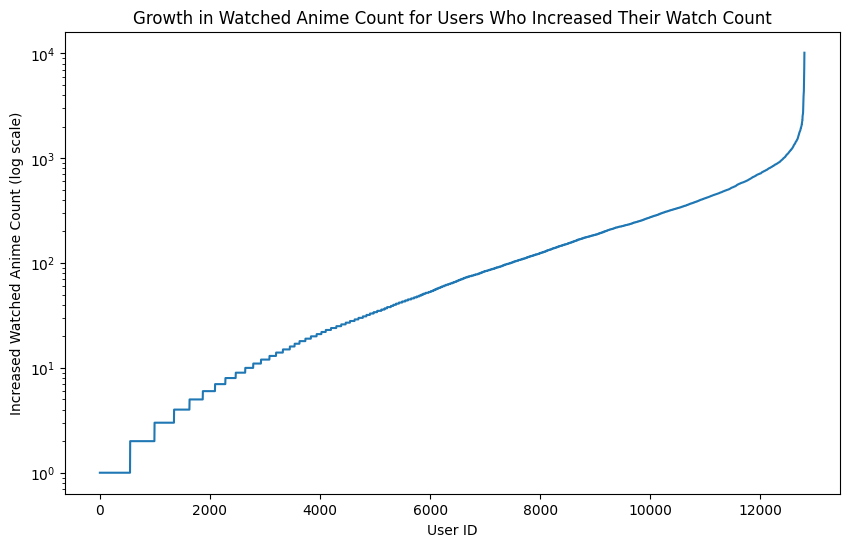

In [35]:
# Create a plot showing the users growth and their increased anime counts, replacing the user IDs on x-axis with growing numbers, log scale for y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(len(grown_users)), growth_counts.sort_values().values)
plt.yscale('log')
plt.xlabel('User ID')
plt.ylabel('Increased Watched Anime Count (log scale)')
plt.title('Growth in Watched Anime Count for Users Who Increased Their Watch Count')
plt.show()

Correlations between the anime dataset and the user watchlist

In [36]:
all_unique_anime = set(watch_clean_23['anime_id'].unique()).union(set(watch_clean_25['anime_id'].unique()))
print("Total unique anime IDs watched across both years:", len(all_unique_anime))

Total unique anime IDs watched across both years: 25060


In [37]:
difference_anime = all_unique_anime.difference(set(anime_filtered['anime_id'].unique()))
print("Anime IDs in watchlists but not in filtered anime dataset:", difference_anime)

Anime IDs in watchlists but not in filtered anime dataset: {np.int64(17419), np.int64(42509), np.int64(6553), np.int64(55077), np.int64(51239), np.int64(51240), np.int64(51241), np.int64(4024), np.int64(40379), np.int64(54591), np.int64(2632), np.int64(37960), np.int64(52554), np.int64(51150), np.int64(50898), np.int64(9045), np.int64(42454), np.int64(42455), np.int64(51424), np.int64(5742), np.int64(35063), np.int64(48125)}
